In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Importing fastai modules

In [2]:
from fastai.vision import URLs, ImageDataBunch, cnn_learner, untar_data, get_image_files, \
get_transforms, models, accuracy, ClassificationInterpretation
from fastai.metrics import error_rate

# Defining batch size

In [3]:
batch_size = 64

# Download Data

In [4]:
path = untar_data(URLs.MNIST); path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [6]:
path_img = path/'training'
path_img.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7')]

# Data exploration

In [7]:
from PIL import Image
import numpy as np

In [12]:
image_path = "/home/jupyter/.fastai/data/mnist_png/training/0/9914.png"

In [13]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [14]:
img = load_image(image_path)

In [15]:
img.shape

(28, 28)

# Data prepration & transformation

In [16]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid='testing', ds_tfms=tfms, size=28)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

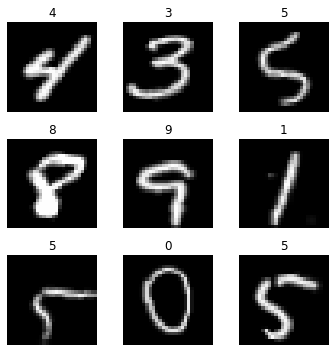

In [17]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

# Training

In [19]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.770284,0.558169,0.818400,00:35
1,0.346678,0.216257,0.928600,00:35
2,0.235202,0.134440,0.956700,00:35
3,0.206328,0.130542,0.957300,00:36


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

In [21]:
interp.most_confused(min_val=5)

[('9', '8', 36),
 ('3', '8', 30),
 ('7', '9', 27),
 ('2', '8', 23),
 ('5', '8', 23),
 ('5', '3', 20),
 ('7', '2', 17),
 ('3', '5', 16),
 ('3', '2', 15),
 ('6', '8', 15),
 ('4', '9', 12),
 ('7', '4', 11),
 ('4', '8', 9),
 ('6', '5', 9),
 ('0', '8', 8),
 ('9', '4', 8),
 ('0', '6', 7),
 ('7', '3', 7),
 ('9', '0', 7),
 ('9', '7', 7),
 ('2', '7', 6),
 ('5', '2', 6),
 ('6', '0', 6),
 ('0', '2', 5),
 ('1', '2', 5),
 ('4', '7', 5),
 ('9', '5', 5)]

### Unfreezing, fine-tuning, and learning rates

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


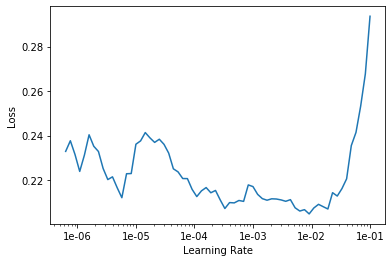

In [23]:
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.180313,0.058262,0.985100,00:40
1,0.082330,0.031825,0.990900,00:40
2,0.060668,0.026715,0.992900,00:41
3,0.020699,0.017889,0.993900,00:41


### Results

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('5', '3', 6),
 ('9', '4', 6),
 ('2', '7', 4),
 ('1', '6', 3),
 ('3', '5', 3),
 ('4', '9', 3),
 ('9', '8', 3),
 ('0', '2', 2),
 ('1', '7', 2),
 ('2', '8', 2),
 ('3', '7', 2),
 ('6', '1', 2),
 ('6', '8', 2),
 ('8', '2', 2),
 ('9', '7', 2)]

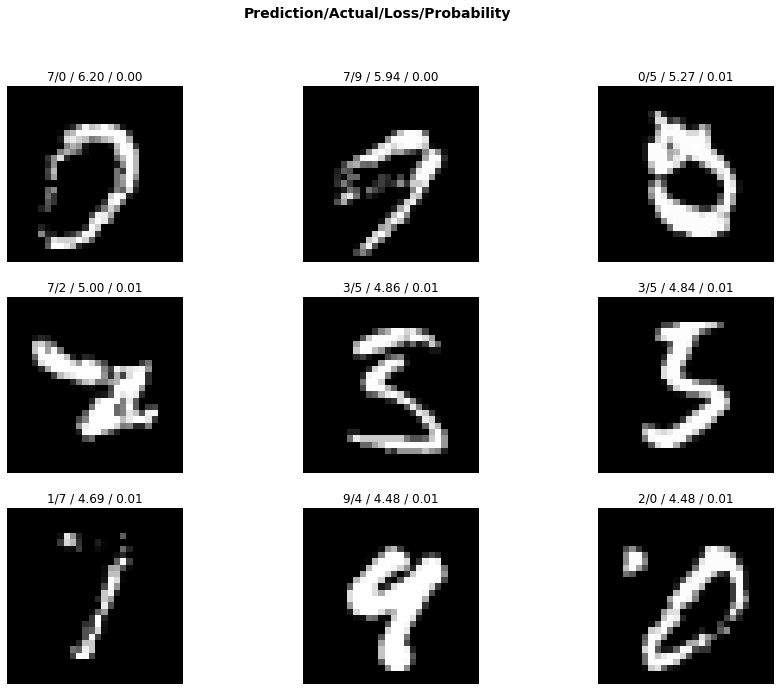

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

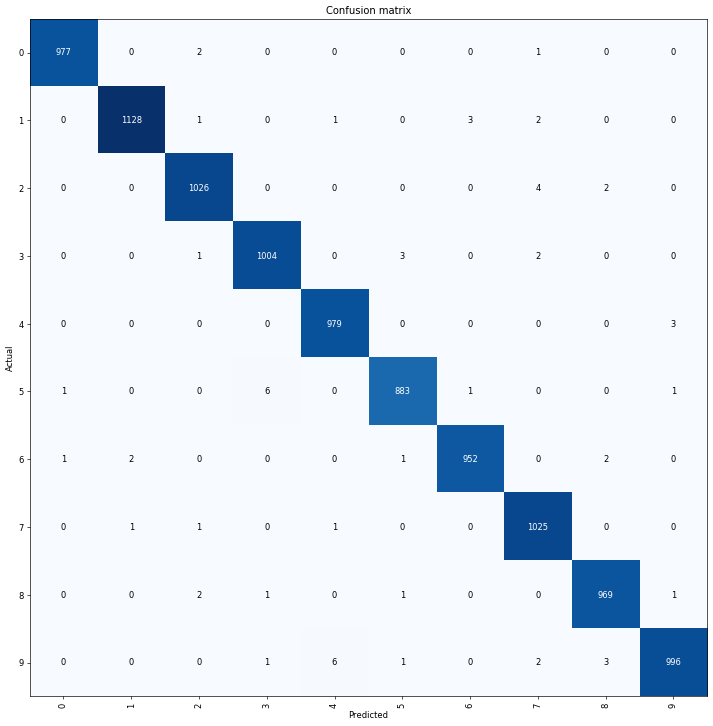

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)